In [ ]:
# Nate Brunacini, nbrunaci@u.rochester.edu
# Supervisor: Kelly A. Douglass
# This file runs scatterplotgenerator_Pilyugin over all galaxies in the MaNGA dataset and writes the resulting gradient, 
# y-intercept, and other values to a text file. It also creates a histogram of slopes for the 3D (or "R") metallicity method.

In [3]:
# Import packages
from scatterplotgenerator_Pilyugin_DR17_v3 import *
import time
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from statistics import mean

In [3]:
params_list = []
total_galaxies = 0
successes = 0
nodata = 0
exceptions = 0# Number of galaxies for which data was not available

with fits.open('drpall-v3_1_1.fits', memmap=True) as drpall:
    
    # Read in drpall data and galactic center data
    data = drpall[1].data
    c_table = Table.read('DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_morph_noWords_v6.txt',
                         format='ascii.commented_header')
    
    # Iterate scatterplotgenerator over galaxies
    # Plots are saved (by the imported functions), and results are written to a file
    # Files produced or folders in which they are contained were renamed with a "_Final" suffix to prevent overwriting
    # NOTE: When this code saves the covariance matrix to the file, it leaves a line break inside that matrix; should fix this
    start = time.time()
    for index in range(len(data['plateifu'])):# Use this to iterate over every galaxy
        total_galaxies += 1
        try:#for i in range(0,1):#
            trialstart = time.time()
            plateifu = data['plateifu'][index]
#             plate,ifu = plateifu.split('-')
            
            # Calculate gradient
            fit_parameters = find_gradient(plateifu,data,c_table)
            
            # Test for insufficient data
            if fit_parameters is None:
                nodata += 1
                print('Galaxy',index,'of',len(data),'(plateifu',plateifu + ') has insufficient data.',
                  flush=True)
                continue
            
            Rp = fit_parameters['R_params']
            
            # Write parameters to file. Write index, plateifu, slope, y-intercept, covariance matrix, list of uncertainties
            addition = [index,plateifu,Rp['slope'],Rp['intercept'],fit_parameters['covar'],
                        np.sqrt(np.diagonal(fit_parameters['covar']))]
            with open('FitParameters_Pilyugin_DR17_v3.txt','a') as param_file:
                param_file.write('\n')
                for element in addition:
                    param_file.write(str(element) + ' ')
            
            # Print trial completion message
            successes += 1
            print('Finished galaxy',index,'of',len(data),'(plateifu',plateifu + ') in',time.time()-trialstart,'seconds',
                  flush=True)
            
        except Exception:
            exceptions += 1
            print('Galaxy',index,'of',len(data),'(plateifu',plateifu + ') raises an exception.',
                  flush=True)
    end = time.time()
    
    # Print statistics
    print('\nNumber of galaxies successfully processed:',successes,flush=True)
    print('Number of galaxies with insufficient data:',nodata,flush=True)
    print('Number of galaxies that raised exceptions:',exceptions,flush=True)
    print('Elapsed time:',str(end - start),'seconds',flush=True)

Galaxy 0 of 11273 (plateifu 10001-12701) has insufficient data.
Galaxy 1 of 11273 (plateifu 10001-12702) has insufficient data.
Galaxy 2 of 11273 (plateifu 10001-12703) has insufficient data.
Galaxy 3 of 11273 (plateifu 10001-12704) has insufficient data.
Galaxy 4 of 11273 (plateifu 10001-12705) has insufficient data.
Galaxy 5 of 11273 (plateifu 10001-1901) has insufficient data.
Galaxy 6 of 11273 (plateifu 10001-1902) has insufficient data.
Galaxy 7 of 11273 (plateifu 10001-3701) has insufficient data.
Galaxy 8 of 11273 (plateifu 10001-3702) has insufficient data.
Galaxy 9 of 11273 (plateifu 10001-3703) has insufficient data.
Galaxy 10 of 11273 (plateifu 10001-3704) has insufficient data.
Galaxy 11 of 11273 (plateifu 10001-6101) has insufficient data.
Galaxy 12 of 11273 (plateifu 10001-6102) has insufficient data.
Galaxy 13 of 11273 (plateifu 10001-6103) has insufficient data.
Galaxy 14 of 11273 (plateifu 10001-6104) has insufficient data.
Galaxy 15 of 11273 (plateifu 10001-9101) has 

Galaxy 128 of 11273 (plateifu 10147-3703) has insufficient data.
Galaxy 129 of 11273 (plateifu 10147-3704) has insufficient data.
Galaxy 130 of 11273 (plateifu 10147-6101) has insufficient data.
Galaxy 131 of 11273 (plateifu 10147-6102) has insufficient data.
Galaxy 132 of 11273 (plateifu 10147-6103) has insufficient data.
Galaxy 133 of 11273 (plateifu 10147-6104) has insufficient data.
Galaxy 134 of 11273 (plateifu 10147-9101) has insufficient data.
Galaxy 135 of 11273 (plateifu 10147-9102) has insufficient data.
Galaxy 136 of 11273 (plateifu 10148-12701) has insufficient data.
Galaxy 137 of 11273 (plateifu 10148-12702) has insufficient data.
Galaxy 138 of 11273 (plateifu 10148-12703) has insufficient data.
Galaxy 139 of 11273 (plateifu 10148-12704) has insufficient data.
Galaxy 140 of 11273 (plateifu 10148-12705) has insufficient data.
Galaxy 141 of 11273 (plateifu 10148-1901) has insufficient data.
Galaxy 142 of 11273 (plateifu 10148-1902) has insufficient data.
Galaxy 143 of 11273 

Galaxy 254 of 11273 (plateifu 10216-9102) has insufficient data.
Galaxy 255 of 11273 (plateifu 10217-12701) has insufficient data.
Galaxy 256 of 11273 (plateifu 10217-12702) has insufficient data.
Galaxy 257 of 11273 (plateifu 10217-12703) has insufficient data.
Galaxy 258 of 11273 (plateifu 10217-12704) has insufficient data.
Galaxy 259 of 11273 (plateifu 10217-12705) has insufficient data.
Galaxy 260 of 11273 (plateifu 10217-1901) has insufficient data.
Galaxy 261 of 11273 (plateifu 10217-1902) has insufficient data.
Galaxy 262 of 11273 (plateifu 10217-3701) has insufficient data.
Galaxy 263 of 11273 (plateifu 10217-3702) has insufficient data.
Galaxy 264 of 11273 (plateifu 10217-3703) has insufficient data.
Galaxy 265 of 11273 (plateifu 10217-3704) has insufficient data.
Galaxy 266 of 11273 (plateifu 10217-6101) has insufficient data.
Galaxy 267 of 11273 (plateifu 10217-6102) has insufficient data.
Galaxy 268 of 11273 (plateifu 10217-6103) has insufficient data.
Galaxy 269 of 11273 

Galaxy 380 of 11273 (plateifu 10224-1902) has insufficient data.
Galaxy 381 of 11273 (plateifu 10224-3701) has insufficient data.
Galaxy 382 of 11273 (plateifu 10224-3702) has insufficient data.
Galaxy 383 of 11273 (plateifu 10224-3703) has insufficient data.
Galaxy 384 of 11273 (plateifu 10224-3704) has insufficient data.
Galaxy 385 of 11273 (plateifu 10224-6101) has insufficient data.
Galaxy 386 of 11273 (plateifu 10224-6102) has insufficient data.
Galaxy 387 of 11273 (plateifu 10224-6103) has insufficient data.
Galaxy 388 of 11273 (plateifu 10224-6104) has insufficient data.
Galaxy 389 of 11273 (plateifu 10224-9101) has insufficient data.
Galaxy 390 of 11273 (plateifu 10224-9102) has insufficient data.
Galaxy 391 of 11273 (plateifu 10225-12701) has insufficient data.
Galaxy 392 of 11273 (plateifu 10225-12702) has insufficient data.
Galaxy 393 of 11273 (plateifu 10225-12703) has insufficient data.
Galaxy 394 of 11273 (plateifu 10225-12704) has insufficient data.
Galaxy 395 of 11273 (

Galaxy 506 of 11273 (plateifu 10485-3702) has insufficient data.
Galaxy 507 of 11273 (plateifu 10485-3703) has insufficient data.
Galaxy 508 of 11273 (plateifu 10485-3704) has insufficient data.
Galaxy 509 of 11273 (plateifu 10485-6101) has insufficient data.
Galaxy 510 of 11273 (plateifu 10485-6102) has insufficient data.
Galaxy 511 of 11273 (plateifu 10485-6103) has insufficient data.
Galaxy 512 of 11273 (plateifu 10485-6104) has insufficient data.
Galaxy 513 of 11273 (plateifu 10485-9101) has insufficient data.
Galaxy 514 of 11273 (plateifu 10485-9102) has insufficient data.
Galaxy 515 of 11273 (plateifu 10486-12701) has insufficient data.
Galaxy 516 of 11273 (plateifu 10486-12702) has insufficient data.
Galaxy 517 of 11273 (plateifu 10486-12703) has insufficient data.
Galaxy 518 of 11273 (plateifu 10486-12704) has insufficient data.
Galaxy 519 of 11273 (plateifu 10486-12705) has insufficient data.
Galaxy 520 of 11273 (plateifu 10486-1902) has insufficient data.
Galaxy 521 of 11273 

Galaxy 632 of 11273 (plateifu 10493-3702) has insufficient data.
Galaxy 633 of 11273 (plateifu 10493-3703) has insufficient data.
Galaxy 634 of 11273 (plateifu 10493-3704) has insufficient data.
Galaxy 635 of 11273 (plateifu 10493-6101) has insufficient data.
Galaxy 636 of 11273 (plateifu 10493-6102) has insufficient data.
Galaxy 637 of 11273 (plateifu 10493-6103) has insufficient data.
Galaxy 638 of 11273 (plateifu 10493-6104) has insufficient data.
Galaxy 639 of 11273 (plateifu 10493-9101) has insufficient data.
Galaxy 640 of 11273 (plateifu 10493-9102) has insufficient data.
Galaxy 641 of 11273 (plateifu 10494-12701) has insufficient data.
Galaxy 642 of 11273 (plateifu 10494-12702) has insufficient data.
Galaxy 643 of 11273 (plateifu 10494-12703) has insufficient data.
Galaxy 644 of 11273 (plateifu 10494-12704) has insufficient data.
Galaxy 645 of 11273 (plateifu 10494-12705) has insufficient data.
Galaxy 646 of 11273 (plateifu 10494-1901) has insufficient data.
Galaxy 647 of 11273 

Galaxy 758 of 11273 (plateifu 10500-9101) has insufficient data.
Galaxy 759 of 11273 (plateifu 10500-9102) has insufficient data.
Galaxy 760 of 11273 (plateifu 10501-12701) has insufficient data.
Galaxy 761 of 11273 (plateifu 10501-12702) has insufficient data.
Galaxy 762 of 11273 (plateifu 10501-12703) has insufficient data.
Galaxy 763 of 11273 (plateifu 10501-12704) has insufficient data.
Galaxy 764 of 11273 (plateifu 10501-12705) has insufficient data.
Galaxy 765 of 11273 (plateifu 10501-1901) has insufficient data.
Galaxy 766 of 11273 (plateifu 10501-1902) has insufficient data.
Galaxy 767 of 11273 (plateifu 10501-3701) has insufficient data.
Galaxy 768 of 11273 (plateifu 10501-3702) has insufficient data.
Galaxy 769 of 11273 (plateifu 10501-3703) has insufficient data.
Galaxy 770 of 11273 (plateifu 10501-3704) has insufficient data.
Galaxy 771 of 11273 (plateifu 10501-6101) has insufficient data.
Galaxy 772 of 11273 (plateifu 10501-6102) has insufficient data.
Galaxy 773 of 11273 

Galaxy 884 of 11273 (plateifu 10508-1901) has insufficient data.
Galaxy 885 of 11273 (plateifu 10508-1902) has insufficient data.
Galaxy 886 of 11273 (plateifu 10508-3701) has insufficient data.
Galaxy 887 of 11273 (plateifu 10508-3703) has insufficient data.
Galaxy 888 of 11273 (plateifu 10508-3704) has insufficient data.
Galaxy 889 of 11273 (plateifu 10508-6101) has insufficient data.
Galaxy 890 of 11273 (plateifu 10508-6102) has insufficient data.
Galaxy 891 of 11273 (plateifu 10508-6103) has insufficient data.
Galaxy 892 of 11273 (plateifu 10508-6104) has insufficient data.
Galaxy 893 of 11273 (plateifu 10508-9101) has insufficient data.
Galaxy 894 of 11273 (plateifu 10508-9102) has insufficient data.
Galaxy 895 of 11273 (plateifu 10509-12701) has insufficient data.
Galaxy 896 of 11273 (plateifu 10509-12702) has insufficient data.
Galaxy 897 of 11273 (plateifu 10509-12703) has insufficient data.
Galaxy 898 of 11273 (plateifu 10509-12704) has insufficient data.
Galaxy 899 of 11273 (

Galaxy 1010 of 11273 (plateifu 10515-6103) has insufficient data.
Galaxy 1011 of 11273 (plateifu 10515-6104) has insufficient data.
Galaxy 1012 of 11273 (plateifu 10515-9101) has insufficient data.
Galaxy 1013 of 11273 (plateifu 10515-9102) has insufficient data.
Galaxy 1014 of 11273 (plateifu 10516-12701) has insufficient data.
Galaxy 1015 of 11273 (plateifu 10516-12702) has insufficient data.
Galaxy 1016 of 11273 (plateifu 10516-12703) has insufficient data.
Galaxy 1017 of 11273 (plateifu 10516-12704) has insufficient data.
Galaxy 1018 of 11273 (plateifu 10516-12705) has insufficient data.
Galaxy 1019 of 11273 (plateifu 10516-1901) has insufficient data.
Galaxy 1020 of 11273 (plateifu 10516-1902) has insufficient data.
Galaxy 1021 of 11273 (plateifu 10516-3701) has insufficient data.
Galaxy 1022 of 11273 (plateifu 10516-3702) has insufficient data.
Galaxy 1023 of 11273 (plateifu 10516-3703) has insufficient data.
Galaxy 1024 of 11273 (plateifu 10516-3704) has insufficient data.
Galax

Galaxy 1134 of 11273 (plateifu 10839-12702) has insufficient data.
Galaxy 1135 of 11273 (plateifu 10839-12703) has insufficient data.
Galaxy 1136 of 11273 (plateifu 10839-12704) has insufficient data.
Galaxy 1137 of 11273 (plateifu 10839-12705) has insufficient data.
Galaxy 1138 of 11273 (plateifu 10839-1901) has insufficient data.
Galaxy 1139 of 11273 (plateifu 10839-1902) has insufficient data.
Galaxy 1140 of 11273 (plateifu 10839-3701) has insufficient data.
Galaxy 1141 of 11273 (plateifu 10839-3702) has insufficient data.
Galaxy 1142 of 11273 (plateifu 10839-3703) has insufficient data.
Galaxy 1143 of 11273 (plateifu 10839-3704) has insufficient data.
Galaxy 1144 of 11273 (plateifu 10839-6101) has insufficient data.
Galaxy 1145 of 11273 (plateifu 10839-6102) has insufficient data.
Galaxy 1146 of 11273 (plateifu 10839-6103) has insufficient data.
Galaxy 1147 of 11273 (plateifu 10839-6104) has insufficient data.
Galaxy 1148 of 11273 (plateifu 10839-9101) has insufficient data.
Galaxy

Galaxy 1258 of 11273 (plateifu 10846-1902) has insufficient data.
Galaxy 1259 of 11273 (plateifu 10846-3701) has insufficient data.
Galaxy 1260 of 11273 (plateifu 10846-3702) has insufficient data.
Galaxy 1261 of 11273 (plateifu 10846-3703) has insufficient data.
Galaxy 1262 of 11273 (plateifu 10846-3704) has insufficient data.
Galaxy 1263 of 11273 (plateifu 10846-6101) has insufficient data.
Galaxy 1264 of 11273 (plateifu 10846-6102) has insufficient data.
Galaxy 1265 of 11273 (plateifu 10846-6103) has insufficient data.
Galaxy 1266 of 11273 (plateifu 10846-6104) has insufficient data.
Galaxy 1267 of 11273 (plateifu 10846-9101) has insufficient data.
Galaxy 1268 of 11273 (plateifu 10846-9102) has insufficient data.
Galaxy 1269 of 11273 (plateifu 11004-12701) has insufficient data.
Galaxy 1270 of 11273 (plateifu 11004-12702) has insufficient data.
Galaxy 1271 of 11273 (plateifu 11004-12703) has insufficient data.
Galaxy 1272 of 11273 (plateifu 11004-12704) has insufficient data.
Galaxy

Galaxy 1382 of 11273 (plateifu 11012-6101) has insufficient data.
Galaxy 1383 of 11273 (plateifu 11012-6102) has insufficient data.
Galaxy 1384 of 11273 (plateifu 11012-6103) has insufficient data.
Galaxy 1385 of 11273 (plateifu 11012-6104) has insufficient data.
Galaxy 1386 of 11273 (plateifu 11012-9101) has insufficient data.
Galaxy 1387 of 11273 (plateifu 11012-9102) has insufficient data.
Galaxy 1388 of 11273 (plateifu 11013-12701) has insufficient data.
Galaxy 1389 of 11273 (plateifu 11013-12702) has insufficient data.
Galaxy 1390 of 11273 (plateifu 11013-12703) has insufficient data.
Galaxy 1391 of 11273 (plateifu 11013-12704) has insufficient data.
Galaxy 1392 of 11273 (plateifu 11013-12705) has insufficient data.
Galaxy 1393 of 11273 (plateifu 11013-1901) has insufficient data.
Galaxy 1394 of 11273 (plateifu 11013-1902) has insufficient data.
Galaxy 1395 of 11273 (plateifu 11013-3701) has insufficient data.
Galaxy 1396 of 11273 (plateifu 11013-3702) has insufficient data.
Galax

Galaxy 1506 of 11273 (plateifu 11019-9102) has insufficient data.
Galaxy 1507 of 11273 (plateifu 11020-12701) has insufficient data.
Galaxy 1508 of 11273 (plateifu 11020-12702) has insufficient data.
Galaxy 1509 of 11273 (plateifu 11020-12703) has insufficient data.
Galaxy 1510 of 11273 (plateifu 11020-12704) has insufficient data.
Galaxy 1511 of 11273 (plateifu 11020-12705) has insufficient data.
Galaxy 1512 of 11273 (plateifu 11020-1901) has insufficient data.
Galaxy 1513 of 11273 (plateifu 11020-1902) has insufficient data.
Galaxy 1514 of 11273 (plateifu 11020-3701) has insufficient data.
Galaxy 1515 of 11273 (plateifu 11020-3702) has insufficient data.
Galaxy 1516 of 11273 (plateifu 11020-3703) has insufficient data.
Galaxy 1517 of 11273 (plateifu 11020-3704) has insufficient data.
Galaxy 1518 of 11273 (plateifu 11020-6101) has insufficient data.
Galaxy 1519 of 11273 (plateifu 11020-6102) has insufficient data.
Galaxy 1520 of 11273 (plateifu 11020-6103) has insufficient data.
Galax

KeyboardInterrupt: 

In [13]:
# Stats for running v3 over all galaxies:
# Number of galaxies successfully processed: 9650
# Number of galaxies with insufficient data: 1313
# Number of galaxies that raised exceptions: 310
# Elapsed time: 20632.051706552505 seconds

In [13]:
# # Create corrected parameter file
# # Removes extraneous line breaks caused by writing covariance matrices
# # Removes brackets and extraneous spaces

# with open('NameOfUncorrectedFile.txt','r') as old_file:
#     with open('NameOfCorrectedFile.txt','a') as corr_file:
#         header = old_file.readline()
#         corr_file.write(header)
#         for index in range(1,19301):
#             line = old_file.readline().replace('[[ ','').replace('[','').replace(']','').replace('\n','')
#             if index % 2 == 1:
#                 corr_file.write('\n')
#             corr_file.write(line)

In [7]:
# Count how many galaxies have negative trend line slopes for R and output their index, plateifu, and slope

# Read in slope data column
data = ascii.read('FitParameters_Pilyugin_DR17_v3_Final.txt')
R_slopes = data.columns['R_slope']

count = 0# Number of galaxies with negative slope
large_negatives = 0# Number of galaxies with slope less than -0.1

for slope in R_slopes:
    
    # Test if slope is negative; if it is, increase count by 1
    if slope < 0:
        count += 1
        
        # Test if slope is less than -0.1; if it is, increase large_negatives by 1
        if slope < -0.1:
            large_negatives += 1

# Print statistics
size = len(R_slopes)
print('Number of galaxies with negative slope:',count,'out of',size)
print('Fraction of galaxies with negative slope:',count/size)
print('Number of galaxies with slope less than -0.1:',large_negatives,'out of',size)
print('Fraction of galaxies with slope less than -0.1:',large_negatives/size)

Number of galaxies with negative slope: 8299 out of 9650
Fraction of galaxies with negative slope: 0.86
Number of galaxies with slope less than -0.1: 4311 out of 9650
Fraction of galaxies with slope less than -0.1: 0.44673575129533677


[WARNING]: OverflowError converting to FloatType in column R_slope, possibly resulting in degraded precision. (AstropyWarning)
[WARNING]: OverflowError converting to FloatType in column R_intercept, possibly resulting in degraded precision. (AstropyWarning)


-1173.244615151251
197953141.55457348


Text(0.5, 1.0, '3D Metallicity Gradient of MaNGA Galaxies')

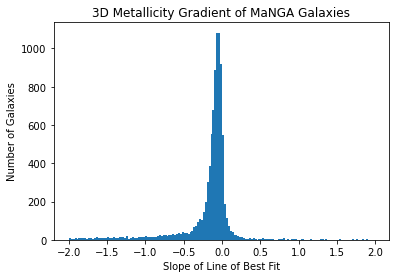

In [24]:
# Create histogram of slopes for R metallicity method

data = ascii.read('FitParameters_Pilyugin_DR17_v3_Final.txt')
R_slope = data.columns['R_slope']
intercepts = data.columns['R_intercept']

print(min(R_slope))
print(max(R_slope))

# plt.hist(R_slope,bins=np.linspace(-2,2,16))#,bins,alpha=0.5,weights=weights[3],label='SDSS DR7',color='gray',density=True)
plt.hist(R_slope,bins=np.arange(-2,2,0.025))#,bins,alpha=0.5,weights=weights[3],label='SDSS DR7',color='gray',density=True)
plt.xlabel('Slope of Line of Best Fit')
plt.ylabel('Number of Galaxies')
plt.title('3D Metallicity Gradient of MaNGA Galaxies')
# plt.savefig('PosterMaps_Updated/SlopeHistogram_N2')
# plt.close()

In [4]:
# Create histogram of slopes comparing void and wall galaxies

# Get indexes and R_slopes
data = Table.read('FitParameters_Pilyugin_DR17_v3_Final.txt',format='ascii.commented_header')
indices = data['index']
R_slopes = data['R_slope']
R_intercepts = data['R_intercept']

# Get vflags
with fits.open('drpall-v3_1_1_vflag_comoving.fits', memmap=True) as drpallv:
    vflags = drpallv[1].data['vflag']

data['vflag'] = vflags[data['index']]

wall_slopes = R_slopes[data['vflag']==0]
void_slopes = R_slopes[data['vflag']==1]

wall_intercepts = R_intercepts[data['vflag']==0]
void_intercepts = R_intercepts[data['vflag']==1]


############ TEMPORARY
print(len(void_slopes))
print(len(wall_slopes))

print(mean(void_slopes))
print(mean(wall_slopes))

for val in wall_slopes:
    if val > 44000:
        print(val)

print((sum(wall_slopes)-197953141.55457348)/4464)
###############


# # Get indices of galaxies of each vflag
# wall_indices = np.where(vflags == 0)[0]# Indices of wall galaxies
# void_indices = np.where(vflags == 1)[0]# Indices of void galaxies
# edge_indices = np.where(vflags == 2)[0]# Indices of galaxies at edge of survey
# other_indices = np.where(vflags == 9)[0]# Indices of galaxies outside survey or with no redshift/sky coordinates info

# # Get line numbers (in paramter file) of galaxies of each vflag; this is to sort the corresponding R_slopes
# wall_linenums,void_linenums,edge_linenums,other_linenums = [],[],[],[]
# for linenum,index in enumerate(indices):
#     if index in wall_indices:
#         wall_linenums.append(linenum)
#     elif index in void_indices:
#         void_linenums.append(linenum)
#     elif index in edge_indices:
#         edge_linenums.append(linenum)
#     elif index in other_indices:
#         other_linenums.append(linenum)
#     else:
#         print('Galaxy found that does not have a known vflag')

# # Sort R_slopes by vflag
# walls = R_slopes[wall_linenums]
# voids = R_slopes[void_linenums]
# edges = R_slopes[edge_linenums]
# others = R_slopes[other_linenums]

[WARNING]: OverflowError converting to FloatType in column R_slope, possibly resulting in degraded precision. (AstropyWarning)
[WARNING]: OverflowError converting to FloatType in column R_intercept, possibly resulting in degraded precision. (AstropyWarning)


1521
4464
-0.31916820818182384
44342.97814074394
197953141.55457348
-1.3636053523188958


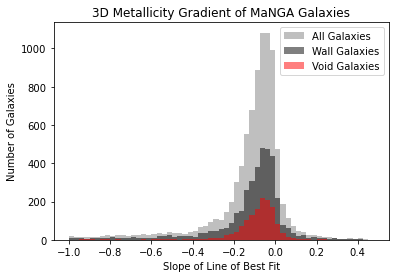

In [6]:
# Plot histogram comparing slopes by vflag
bin_width = 0.025
bins = np.arange(-1,0.5,bin_width)
plt.hist(R_slopes,bins,alpha=0.5,label='All Galaxies',color='gray')
plt.hist(wall_slopes,bins,alpha=0.5,label='Wall Galaxies',color='black')
plt.hist(void_slopes,bins,alpha=0.5,label='Void Galaxies',color='red')
plt.legend()
plt.xlabel('Slope of Line of Best Fit')
plt.ylabel('Number of Galaxies')
plt.title('3D Metallicity Gradient of MaNGA Galaxies')
plt.show()

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


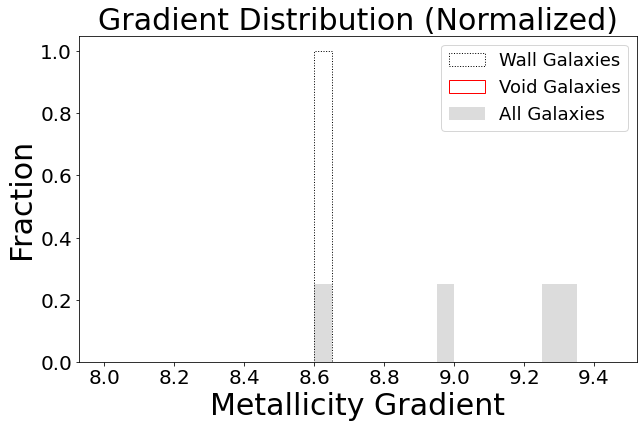

In [13]:
heights_all,_ = np.histogram(R_slopes,bins=bins)
heights_walls,_ = np.histogram(wall_slopes,bins=bins)
heights_voids,_ = np.histogram(void_slopes,bins=bins)

norm_heights_all = heights_all / np.sum(heights_all)
norm_heights_walls = heights_walls / np.sum(heights_walls)
norm_heights_voids = heights_voids / np.sum(heights_voids)

plt.figure(figsize=(10, 6))

plt.bar(bins[:-1],norm_heights_all,width=bin_width,align='edge',color='gainsboro',label='All Galaxies')
plt.hist(bins[:-1],bins=bins,weights=norm_heights_walls,color='k',histtype='step',linestyle='dotted',label='Wall Galaxies')
plt.hist(bins[:-1],bins=bins,weights=norm_heights_voids,color='r',histtype='step',label='Void Galaxies')
# plt.plot(bins[:-1],norm_heights_walls,'k:',label='Wall Galaxies')
# plt.bar(bins[:-1],norm_heights_voids,width=bin_width,align='edge')

plt.tick_params(labelsize=20)

plt.title('Gradient Distribution (Normalized)',fontsize=30)
plt.xlabel('Metallicity Gradient',fontsize=30)
plt.ylabel('Fraction',fontsize=30)
plt.legend(fontsize=18)
plt.savefig('THESIS_Normalized_Histogram',dpi=500)

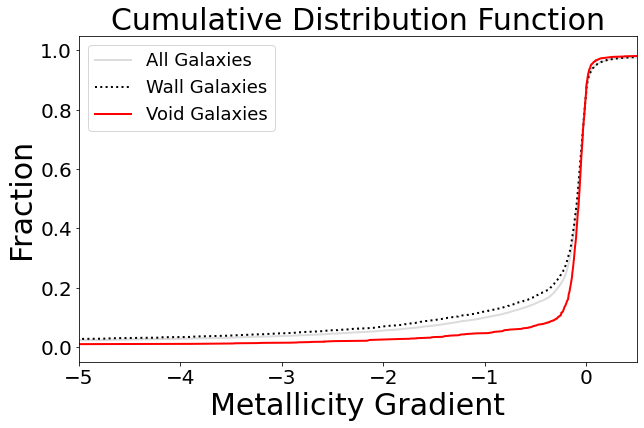

In [16]:
# Cumulative Distribution Function

# # Remove all non-real values
# finite_boolean = np.isfinite(x)

all_x = sorted(R_slopes)
all_y = np.arange(len(R_slopes))/len(R_slopes)

void_x = sorted(void_slopes)
wall_x = sorted(wall_slopes)

void_y = np.arange(len(void_slopes))/len(void_slopes)
wall_y = np.arange(len(wall_slopes))/len(wall_slopes)

fig, ax = plt.subplots(figsize=(10, 6))

ax.tick_params(labelsize=20)

ax.plot(all_x, all_y, c='gainsboro', linewidth=2, label='All Galaxies')
ax.plot(wall_x, wall_y, 'k:', linewidth=2, label='Wall Galaxies')
ax.plot(void_x, void_y, 'r', linewidth=2, label='Void Galaxies')

ax.set_xlim((-5,0.5))

ax.set_title('Cumulative Distribution Function',fontsize=30)
ax.set_xlabel('Metallicity Gradient', fontsize=30)
ax.set_ylabel('Fraction', fontsize=30)

ax.legend(fontsize=18)
plt.savefig('Writeup_CDF',dpi=500)

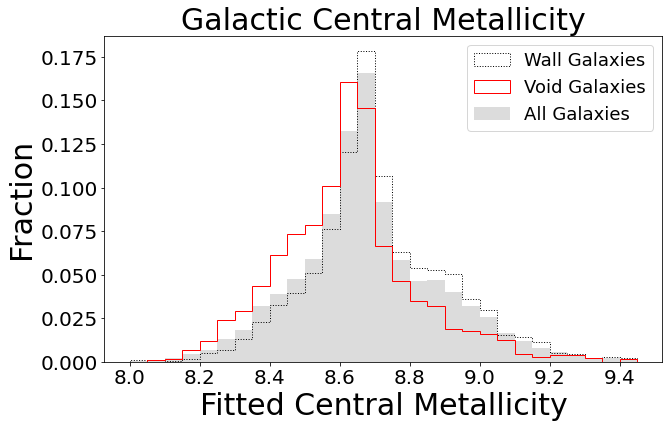

In [11]:
bin_width = 0.05
bins = np.arange(8,9.5,bin_width)

heights_all,_ = np.histogram(R_intercepts,bins=bins)
heights_walls,_ = np.histogram(wall_intercepts,bins=bins)
heights_voids,_ = np.histogram(void_intercepts,bins=bins)

norm_heights_all = heights_all / np.sum(heights_all)
norm_heights_walls = heights_walls / np.sum(heights_walls)
norm_heights_voids = heights_voids / np.sum(heights_voids)

plt.figure(figsize=(10, 6))

plt.bar(bins[:-1],norm_heights_all,width=bin_width,align='edge',color='gainsboro',label='All Galaxies')
plt.hist(bins[:-1],bins=bins,weights=norm_heights_walls,color='k',histtype='step',linestyle='dotted',label='Wall Galaxies')
plt.hist(bins[:-1],bins=bins,weights=norm_heights_voids,color='r',histtype='step',label='Void Galaxies')
# plt.plot(bins[:-1],norm_heights_walls,'k:',label='Wall Galaxies')
# plt.bar(bins[:-1],norm_heights_voids,width=bin_width,align='edge')

plt.tick_params(labelsize=20)

plt.title('Galactic Central Metallicity',fontsize=30)
plt.xlabel('Fitted Central Metallicity',fontsize=30)
plt.ylabel('Fraction',fontsize=30)
plt.legend(fontsize=18)
plt.savefig('THESIS_Fitted_Central_Metallicity',dpi=500)


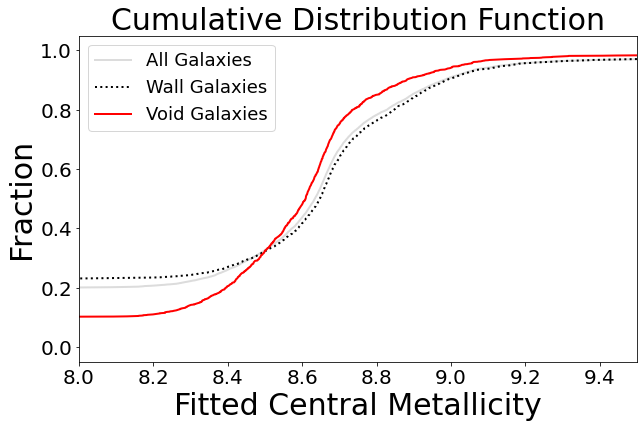

In [10]:
# Cumulative Distribution Function

# # Remove all non-real values
# finite_boolean = np.isfinite(x)

all_x = sorted(R_intercepts)
all_y = np.arange(len(R_intercepts))/len(R_intercepts)

void_x = sorted(void_intercepts)
wall_x = sorted(wall_intercepts)

void_y = np.arange(len(void_intercepts))/len(void_intercepts)
wall_y = np.arange(len(wall_intercepts))/len(wall_intercepts)

fig, ax = plt.subplots(figsize=(10, 6))

ax.tick_params(labelsize=20)

ax.plot(all_x, all_y, c='gainsboro', linewidth=2, label='All Galaxies')
ax.plot(wall_x, wall_y, 'k:', linewidth=2, label='Wall Galaxies')
ax.plot(void_x, void_y, 'r', linewidth=2, label='Void Galaxies')

ax.set_xlim((8,9.5))

ax.set_title('Cumulative Distribution Function',fontsize=30)
ax.set_xlabel('Fitted Central Metallicity', fontsize=30)
ax.set_ylabel('Fraction', fontsize=30)

ax.legend(fontsize=18)
plt.savefig('THESIS_CDF_Fitted_Central_Metallicity',dpi=500)